In [1]:
%load_ext nb_mypy
%nb_mypy Off

Version 1.0.5


In [2]:
from __future__ import annotations
import numpy as np
import random
import copy

from typing import Tuple, List
from numpy import array, zeros

# from Big_Class import Big_Class  # already imported one NETfuncs is imported
from User_Variables import User_Variables  # already imported one NETfuncs is imported
from Network_Structure import Network_Structure  # already imported one NETfuncs is imported
from Big_Class import Big_Class
from Network_State import Network_State
from Networkx_Net import Networkx_Net
import NETfuncs, matrix_functions, functions, statistics, plot_functions, solve

In [3]:
## Parameters

Nin: int = 2
Ninter: int = 0
Nout: int = 3

# learning rate
# alpha_vec = np.array([0.2, 0.5, 1.0, 2.0, 2.5, 2.7, 3.5, 4.0, 8.0])  # 1D array = const alpha, array of arrays = annealed
# alpha_vec = np.array([np.append(np.linspace(4.1,4.8,200), np.linspace(4.8,4.1,200))])  # 1D array for constant alpha, array of arrays for annealed alpha
# alpha_vec: np.ndarray = np.array([0.2])  # for allostery, regression and general_reg
# alpha_vec = np.array([0.1])  # for general_reg_allRsChange
# alpha_vec = np.array([np.linspace(5,3.85,40)])  # 1D array for constant alpha, array of arrays for annealed alpha
# alpha_vec = np.array([4.8])
alpha: float = 0.2  # for network combine attempt

# resistance-pressure proportionality factor
gamma: np.ndarray = np.array([1.0])

# R_update: str = 'propto'
R_update = 'deltaR'

# training length
iterations = 460
    
supress_prints: bool = False
bc_noise: float = 0.0
use_p_tag: bool = True
    
M_values: np.ndarray = array([0.4, 0.25, 0.1, 0.15, 0.02, 0.3, 0.35, 0.15])
    
## Networkx sizes
scale: float = 5.0
squish: float = 0.01

In [4]:
## Assign input and output nodes a.f.o lattice size and row choice
input_nodes_arr, inter_nodes_arr, output_nodes_arr, ground_nodes_arr = matrix_functions.build_input_output_and_ground(Nin, Ninter, Nout)

In [5]:
print('input_nodes_arr ', input_nodes_arr)
print('inter_nodes_arr ', inter_nodes_arr)
print('output_nodes_arr ', output_nodes_arr)
print('ground_nodes_arr ', ground_nodes_arr)

input_nodes_arr  [0 1]
inter_nodes_arr  []
output_nodes_arr  [2 3 4]
ground_nodes_arr  [5]


In [6]:
## Variables class - mostly user choices
Variabs = User_Variables(iterations,\
                         Nin, \
                         Nout, \
                         gamma, \
                         R_update, \
                         use_p_tag, \
                         supress_prints, \
                         bc_noise)
Variabs.assign_alpha_vec(alpha)
print('alpha_vec', Variabs.alpha_vec)
Variabs.create_M(M_values)

alpha_vec [0.2 0.2 0.2]


In [7]:
## Big Class containing all classes in Network Simulation
BigClass = Big_Class(Variabs)

In [8]:
## Structure class - build incidence matrices and 1d arrays of edges

Strctr = Network_Structure(input_nodes_arr, \
                           output_nodes_arr, \
                           inter_nodes_arr, \
                           ground_nodes_arr,)
Strctr.build_incidence()
Strctr.build_edges()
BigClass.add_Strctr(Strctr)  # add to big class

In [9]:
## Initiate internal flow network state class

State = Network_State(Nin, Nout)
State.initiate_resistances(BigClass)
BigClass.add_State(State)  # add to big class

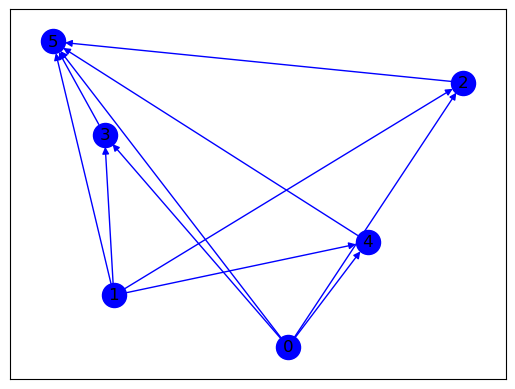

NET is ready


In [10]:
## build network graphics class and plot structure

NET = Networkx_Net(scale, squish)
NET.buildNetwork(BigClass)
NET.build_pos_lattice(BigClass, plot=True, node_labels=True)
BigClass.add_NET(NET)  # add to big class

## Start loop from here

In [11]:
for i in range(Variabs.iterations):
    print('i', i)
    State.draw_p_in_and_desired(Variabs)
    print('p_drawn ', State.input_drawn)
    print('desired output', State.desired)
    State.solve_flow_until_conv(BigClass, "measure")  # measure and don't change resistances
    print('output meausred', State.output)
    if not i % 2:  # even iterations, take another sampled pressure and measure again
        pass
    else:  # odd iterations, go to dual problem and update resistances
        State.calc_loss(BigClass)
        State.update_pressure_dual(BigClass)
        State.update_output_dual(BigClass)
        State.solve_flow_until_conv(BigClass, "dual")  # measure and don't change resistances
        State.update_Rs(BigClass)

i 0
p_drawn  [1.31400768 0.53304575]
desired output [0.65886451 0.21135763 0.18619388]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
output meausred [0.61568448 0.61568448 0.61568448]
i 1
p_drawn  [1.5516084  1.79717448]
desired output [1.06993698 0.42473701 0.57018451]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
output meausred [1.11626096 1.11626096 1.11626096]
delta_loss [-0.08950401 -0.2871971  -0.11658585]
delta_input [0.23760071 1.26412873]
the dot itself [-0.02344107 -0.12471564]
input_dual_nxt for inside function [1.02344107 1.12471564]
loss= [[-0.04632398 -0.69152395 -0.54607645]
 [ 0.04318003 -0.40432685 -0.4294906 ]]
time= 1
input_dual_nxt= [1.02344107 1.12471564]
x-xprime [0.50057648 0.50057648 0.50057648]
loss-loss_prime [-0.08950401 -0.2871971  -0.11658585]
output_dual_nxt [0.49103928 0.47124718 0.48832797]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
R_nxt [1.53240179 1.55219389 1.53511309 1.63367636 1.65346847 1.63638767
 2.02344107 2.12471564 1.49103928 1.47124718 1.48832797]
i 2
p_drawn  

x-xprime [-0.0585273  -0.03841625 -0.04223437]
loss-loss_prime [ 0.10127316 -0.00259344 -0.12548717]
output_dual_nxt [-1.18544894e-03  1.99260868e-05  1.05997429e-03]
Rs [2.95331805 3.52589712 3.41542166 2.45006921 3.02264828 2.91217282
 3.56921495 3.06596611 1.6158969  1.04331783 1.15379329]
R_nxt [2.95705623 3.52842992 3.41691441 2.44808702 3.01946071 2.9079452
 3.57176768 3.06279847 1.61471145 1.04333776 1.15485327]
i 102
p_drawn  [0.48042926 0.72346933]
desired output [0.37303904 0.15656332 0.22664938]
Rs [2.95705623 3.52842992 3.41691441 2.44808702 3.01946071 2.9079452
 3.57176768 3.06279847 1.61471145 1.04333776 1.15485327]
output meausred [0.33528977 0.23887314 0.25917118]
i 103
p_drawn  [0.23477158 0.23115485]
desired output [0.15169734 0.05815039 0.07404189]
Rs [2.95705623 3.52842992 3.41691441 2.44808702 3.01946071 2.9079452
 3.57176768 3.06279847 1.61471145 1.04333776 1.15485327]
output meausred [0.12724828 0.09096422 0.09863799]
delta_loss [-0.0133002   0.04949598  0.007925

x-xprime [-0.27058507 -0.15278436 -0.18254741]
loss-loss_prime [ 0.04700106  0.02435587 -0.06695281]
output_dual_nxt [-0.00254356 -0.00074424  0.00244441]
Rs [3.25976688 4.14390908 3.93793326 2.49773487 3.38187707 3.17590124
 4.02741796 3.26538594 1.76765108 0.88350888 1.08948471]
R_nxt [3.26234644 4.14468932 3.93552484 2.50100858 3.38335146 3.17418698
 4.02745396 3.2661161  1.76510752 0.88276464 1.09192912]
i 216
p_drawn  [1.11696107 1.30719826]
desired output [0.77358399 0.30777585 0.4144987 ]
Rs [3.26234644 4.14468932 3.93552484 2.50100858 3.38335146 3.17418698
 4.02745396 3.2661161  1.76510752 0.88276464 1.09192912]
output meausred [0.67958615 0.39281112 0.46845866]
i 217
p_drawn  [1.39606307 1.18642592]
desired output [0.85503171 0.3175702  0.38384904]
Rs [3.26234644 4.14468932 3.93552484 2.50100858 3.38335146 3.17418698
 4.02745396 3.2661161  1.76510752 0.88276464 1.09192912]
output meausred [0.70886021 0.41176344 0.49059436]
delta_loss [ 0.05217365 -0.00915797 -0.05278536]
delta

Rs [3.33584373 4.27405291 4.03053699 2.4814096  3.41961878 3.17610287
 4.12410344 3.26966931 1.78825971 0.85005053 1.09356645]
output meausred [0.46300214 0.25332739 0.31320854]
i 283
p_drawn  [0.42883561 1.56507587]
desired output [0.56280321 0.27764494 0.47809947]
Rs [3.33584373 4.27405291 4.03053699 2.4814096  3.41961878 3.17610287
 4.12410344 3.26966931 1.78825971 0.85005053 1.09356645]
output meausred [0.60165616 0.32770138 0.40555316]
delta_loss [-0.03435797 -0.00901525  0.04194859]
delta_input [-0.01986512  0.44896838]
the dot itself [ 5.66007772e-06 -1.27922514e-04]
input_dual_nxt for inside function [0.00610472 0.0003052 ]
loss= [[-0.03885295 -0.05005644  0.07254631]
 [-0.00449498 -0.04104119  0.03059772]]
time= 142
input_dual_nxt= [0.00610472 0.0003052 ]
x-xprime [0.13865402 0.07437399 0.09234462]
loss-loss_prime [-0.03435797 -0.00901525  0.04194859]
output_dual_nxt [-0.00095277 -0.0001341   0.00077475]
Rs [3.33584373 4.27405291 4.03053699 2.4814096  3.41961878 3.17610287
 4.

x-xprime [0.0367944  0.02236109 0.02692989]
loss-loss_prime [ 0.05698115 -0.0085061  -0.05374748]
output_dual_nxt [ 4.19317406e-04 -3.80411317e-05 -2.89482709e-04]
Rs [3.33202237 4.31335958 4.07647967 2.45330221 3.43463941 3.19775951
 4.15306325 3.27434308 1.82104088 0.83970367 1.07658358]
R_nxt [3.33192249 4.31371706 4.07708859 2.45276733 3.4345619  3.19793343
 4.15338269 3.27422753 1.82146019 0.83966563 1.0762941 ]
i 306
p_drawn  [0.55301828 0.95084792]
desired output [0.45891929 0.19792902 0.29631474]
Rs [3.33192249 4.31371706 4.07708859 2.45276733 3.4345619  3.19793343
 4.15338269 3.27422753 1.82146019 0.83966563 1.0762941 ]
output meausred [0.44050087 0.23632682 0.29115437]
i 307
p_drawn  [0.13378967 0.80161441]
desired output [0.25391947 0.13362113 0.24316012]
Rs [3.33192249 4.31371706 4.07708859 2.45276733 3.4345619  3.19793343
 4.15338269 3.27422753 1.82146019 0.83966563 1.0762941 ]
output meausred [0.29198175 0.15427225 0.19062838]
delta_loss [-0.0564807   0.01774668  0.047371

Rs [3.3680097  4.39837577 4.13621735 2.44438009 3.47474616 3.21258774
 4.21138387 3.28775426 1.84337416 0.8130081  1.07516652]
output meausred [0.26895932 0.13915101 0.17609552]
delta_loss [-0.14465957  0.03306471  0.12310281]
delta_input [-0.99058003 -0.20595411]
the dot itself [-0.00227991 -0.00047402]
input_dual_nxt for inside function [0.0022726 0.0005337]
loss= [[ 0.01447082 -0.01920237 -0.00062467]
 [ 0.15913039 -0.05226708 -0.12372748]]
time= 190
input_dual_nxt= [0.0022726 0.0005337]
x-xprime [-0.30306098 -0.16301583 -0.20470064]
loss-loss_prime [-0.14465957  0.03306471  0.12310281]
output_dual_nxt [ 0.00876813 -0.00107801 -0.00503984]
Rs [3.3680097  4.39837577 4.13621735 2.44438009 3.47474616 3.21258774
 4.21138387 3.28775426 1.84337416 0.8130081  1.07516652]
R_nxt [3.36152148 4.40173369 4.1435371  2.43608598 3.47629819 3.2181016
 4.21366378 3.28822828 1.8521423  0.81193009 1.07012668]
i 380
p_drawn  [0.71342645 1.64338458]
desired output [0.69621673 0.31785033 0.5072839 ]
Rs [

Rs [3.39773114 4.41488848 4.13501352 2.45966608 3.47682342 3.19694846
 4.22325122 3.28518616 1.82552008 0.80836274 1.0882377 ]
output meausred [0.48022106 0.25159423 0.32244083]
i 397
p_drawn  [0.25774553 1.92281621]
desired output [0.58380226 0.31419698 0.58199977]
Rs [3.39773114 4.41488848 4.13501352 2.45966608 3.47682342 3.19694846
 4.22325122 3.28518616 1.82552008 0.80836274 1.0882377 ]
output meausred [0.68681242 0.34914427 0.45046656]
delta_loss [-0.18762657  0.003101    0.18805485]
delta_input [-0.63765832  1.09611249]
the dot itself [-0.00045009  0.0007737 ]
input_dual_nxt for inside function [ 0.00065205 -0.00033065]
loss= [[-0.10301016 -0.03494729  0.13153321]
 [ 0.08461641 -0.03804828 -0.05652164]]
time= 199
input_dual_nxt= [ 0.00065205 -0.00033065]
x-xprime [0.20659137 0.09755004 0.12802573]
loss-loss_prime [-0.18762657  0.003101    0.18805485]
output_dual_nxt [-7.75240602e-03  6.05004762e-05  4.81517190e-03]
Rs [3.39773114 4.41488848 4.13501352 2.45966608 3.47682342 3.1969

R theoretical 1.0203426445264794


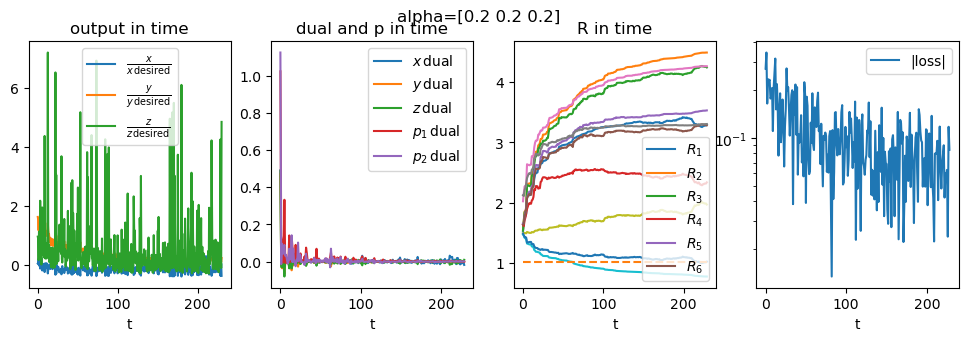

In [12]:
plot_functions.plot_importants(State, Variabs, State.desired_in_t, Variabs.M)